In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
feedback=pd.read_csv("ACME-HappinessSurvey2020.csv")

In [3]:
feedback.head(10)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
5,1,5,5,3,5,5,5
6,0,3,1,2,2,1,3
7,1,5,4,4,4,4,5
8,0,4,1,4,4,4,4
9,0,4,4,4,2,5,5


In [4]:
#Rename columns 
feedback.columns=['Happy/Unhappy','On Time','As Expected','Ordered Everything','Good Price','Satisfied with courier','Easy App']

In [5]:
feedback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Happy/Unhappy           126 non-null    int64
 1   On Time                 126 non-null    int64
 2   As Expected             126 non-null    int64
 3   Ordered Everything      126 non-null    int64
 4   Good Price              126 non-null    int64
 5   Satisfied with courier  126 non-null    int64
 6   Easy App                126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [6]:
feedback.describe()

,Happy/Unhappy,On Time,As Expected,Ordered Everything,Good Price,Satisfied with courier,Easy App
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
#check null value 
feedback.isnull().sum()

Happy/Unhappy             0
On Time                   0
As Expected               0
Ordered Everything        0
Good Price                0
Satisfied with courier    0
Easy App                  0
dtype: int64

In [8]:
#check each feature counts

In [9]:
feedback['Happy/Unhappy'].value_counts()

Happy/Unhappy
1    69
0    57
Name: count, dtype: int64

In [10]:
feedback['On Time'].value_counts()

On Time
5    65
4    40
3    20
1     1
Name: count, dtype: int64

In [11]:
feedback['As Expected'].value_counts()

As Expected
3    42
2    34
1    27
4    17
5     6
Name: count, dtype: int64

In [12]:
feedback['Ordered Everything'].value_counts()

Ordered Everything
3    55
4    33
5    17
2    14
1     7
Name: count, dtype: int64

In [13]:
feedback['Good Price'].value_counts()

Good Price
4    53
3    41
5    25
2     5
1     2
Name: count, dtype: int64

In [14]:
feedback['Satisfied with courier'].value_counts()

Satisfied with courier
4    50
5    31
3    22
2    16
1     7
Name: count, dtype: int64

In [15]:
feedback['Easy App'].value_counts()

Easy App
5    57
4    47
3    20
2     1
1     1
Name: count, dtype: int64

## Data Visualization 

<Axes: xlabel='Happy/Unhappy', ylabel='count'>

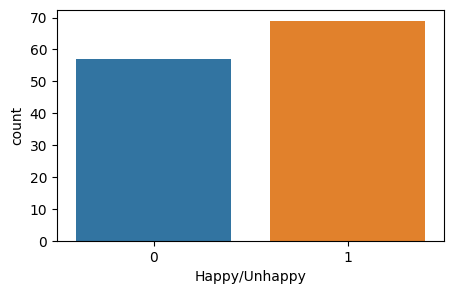

In [16]:
# Plots : number of happy customers ; target y 
fig=plt.figure(figsize=(5,3))
sns.countplot(x= feedback['Happy/Unhappy'],data = feedback)


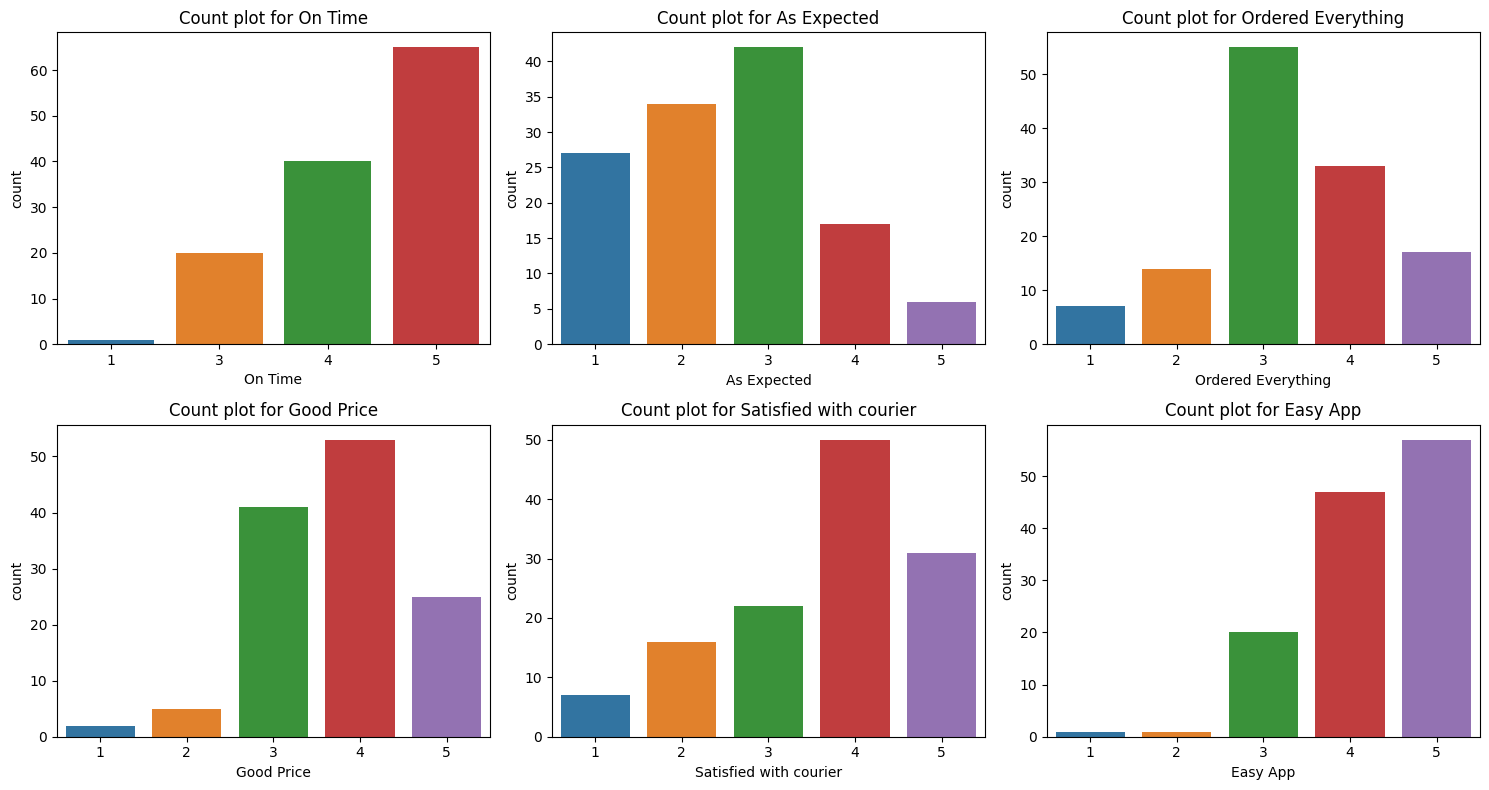

In [17]:
# Create a 2x3 grid of subplots
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# Flatten the axes
ax = ax.flatten()

# Define the columns to plot
columns_to_plot = ['On Time', 'As Expected', 'Ordered Everything', 'Good Price', 'Satisfied with courier', 'Easy App']

# Loop through columns and create count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=feedback, x=feedback[column], ax=ax[i])
    ax[i].set_title(f'Count plot for {column}')

# Remove any empty subplots if needed
for i in range(len(columns_to_plot), len(ax)):
    fig.delaxes(ax[i])

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


In [18]:
quantity= feedback['Happy/Unhappy'].value_counts()
quantity

Happy/Unhappy
1    69
0    57
Name: count, dtype: int64

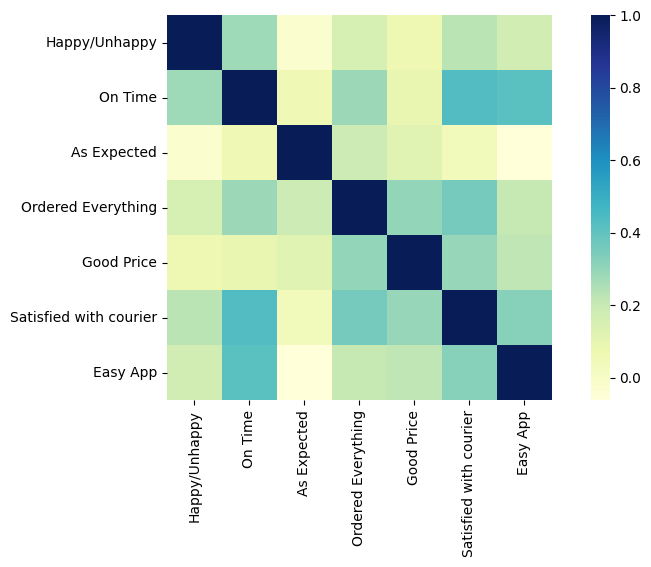

In [19]:
# correlation matrix 
corr_matrix=feedback.corr()
fig=plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix,cmap='YlGnBu',square=True)
plt.show()

In [20]:
#tested dropping "satisfied with courier since it has the highest corr with on time, accuracy on different models was worse

In [21]:
#test creating new feature: on time + satisfied with courier 
#df=pd.DataFrame()
#df['on time']=feedback['On Time']
#df['courier']=feedback['Satisfied with courier']
#df['satisfaction']=df.mean(axis=1)
#feedback['Satisfaction']=df['satisfaction']  #Average on time and courier satisfaction into 1 column; accuracy accross models dropped 

## Model Building

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix


#### Testing Base Models Without Any Modifications On Data

In [23]:
# preparing the data 
x=feedback.drop(['Happy/Unhappy'], axis=1)
y=feedback['Happy/Unhappy'] 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=0) # 70% training and 30% test


In [24]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',random_state=1) # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7368421052631579
F1 Score: 0.761904761904762


In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.47368421052631576
F1 Score: 0.5


In [26]:
#create log regression
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5789473684210527
F1 Score: 0.6363636363636365


In [27]:
#create Random Fores model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.47368421052631576
F1 Score: 0.5


In [28]:
# for KNN, its better to scale the data since its distance based algorithm

In [29]:
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data66
scaled_x=scaler.fit_transform(x)

X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_x,y,test_size=0.15,random_state=0) # 70% training and 30% test


In [30]:
#create KNN model

knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5789473684210527
F1 Score: 0.5


#### Testing Adding new feature to feedback 

In [31]:
feedback['Satisfaction'] = feedback.drop(['Happy/Unhappy'], axis=1).mean(axis=1) # average all features 

In [32]:
# preparing the data 
x1=feedback.drop(['Happy/Unhappy'], axis=1)
y1=feedback['Happy/Unhappy'] 


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x1,y1,test_size=0.15,random_state=0) # 70% training and 30% test

In [34]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear',random_state=1) # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7894736842105263
F1 Score: 0.8000000000000002


In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.631578947368421
F1 Score: 0.6666666666666666


In [36]:
#create log regression
logr = linear_model.LogisticRegression(random_state=1)
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5789473684210527
F1 Score: 0.6363636363636365


In [37]:
#create Random Fores model
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.5789473684210527
F1 Score: 0.6363636363636365


In [38]:
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data66
scaled_x=scaler.fit_transform(x1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_x,y1,test_size=0.15,random_state=0) # 70% training and 30% test


In [40]:
#create KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train1, y_train1)
y_pred = knn_model.predict(X_test1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred))
print("F1 Score:",metrics.f1_score(y_test1, y_pred))

Accuracy: 0.3684210526315789
F1 Score: 0.45454545454545453


In [41]:
# Adding New feature " Satisfaction " Improved the accuracy and f1 score of the models 

### Hyperparameter Tuning Using GridSearch 

### SVM GridSearch

In [42]:
# Data Frame to save the final accuracy and f1 score of each model 
final_score=pd.DataFrame(columns=['Model','Accuracy','F1 Score'])
                         

In [43]:
# Create a parameter grid to search over
param_grid = {
    #'C': [0.1,0.5,1, 10],  # Regularization parameter
    'kernel': ['linear'],  # Kernel type
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 0.2,0.3,0.4,0.5,1] }  # Kernel coefficient for 'rbf' kernel

# Create an SVM classifier
clf = svm.SVC(random_state=1)

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)

final_score.loc[0]= ['SVM',Accuracy, F1_score]


Best Parameters: {'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7894736842105263
F1 Score: 0.8000000000000002


#### Decision Tree GridSearch

In [44]:
# Create a parameter grid to search over
param_grid = {
    'criterion': ['entropy', 'gini', 'log_loss'],  # criterion; quality of split
    'splitter': ['best','random'],  # strategy .... split at each node
    'max_depth':[None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], # maximum depth of the tree
    'min_samples_split':np.arange(2, 10),
    'min_samples_leaf':np.arange(1, 5),
    'max_features':['auto', 'sqrt', 'log2']
}  

# Create an Decision Tree classifier
clf = DecisionTreeClassifier(random_state=1)

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)

final_score.loc[1]= ['Decision Tree',Accuracy, F1_score]


Best Parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Accuracy: 0.631578947368421
F1 Score: 0.6666666666666666


### log regression GridSearch

In [45]:
# Create a parameter grid to search over
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # 
    'C': np.arange(0.1, 10,0.1)
}  

# Create an Logistic Regression classifier
clf = linear_model.LogisticRegression(random_state=1)

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)

final_score.loc[2]= ['Logistic Regression',Accuracy, F1_score]


Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.5789473684210527
F1 Score: 0.6363636363636365


### Random Forest GridSearch

In [46]:
# Create a parameter grid to search over
param_grid = {
    'n_estimators': np.arange(10,100,10),  # 
    #'criterion': ['gini','entropy','log_loss'],
    'max_depth': [None,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150] # maximum depth of the tree ,
    #'min_samples_split': np.arange(2, 10) ,
    #'min_samples_leaf':  np.arange(2, 5),
    #'max_features':['auto', 'sqrt', 'log2']
}  

# Create an Random Forest classifier
clf = RandomForestClassifier(random_state=1)

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)

final_score.loc[3]= ['Random Forest',Accuracy, F1_score]


Best Parameters: {'max_depth': 11, 'n_estimators': 50}
Accuracy: 0.5263157894736842
F1 Score: 0.5714285714285713


### KNN GridSearch

In [47]:
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data66
scaled_x=scaler.fit_transform(x)

X_train, X_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.15,random_state=0) # 70% training and 30% test


In [48]:
# Create a parameter grid to search over
param_grid = {
    'n_neighbors':np.arange(2,20)
}  

# Create an KNN classifier
clf = KNeighborsClassifier() 


# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for predictions
y_pred_grid = best_estimator.predict(X_test)

Accuracy= metrics.accuracy_score(y_test, y_pred_grid)
F1_score= metrics.f1_score(y_test, y_pred_grid)
# Print the best parameters, accuracy, and F1 score
print("Best Parameters:", best_params)
print("Accuracy:", Accuracy)
print("F1 Score:", F1_score)

final_score.loc[4]= ['KNN',Accuracy, F1_score]


Best Parameters: {'n_neighbors': 5}
Accuracy: 0.47368421052631576
F1 Score: 0.5454545454545454


In [49]:
final_score

,Model,Accuracy,F1 Score
0,SVM,0.789474,0.800000
1,Decision Tree,0.631579,0.666667
2,Logistic Regression,0.578947,0.636364
3,Random Forest,0.526316,0.571429
4,KNN,0.473684,0.545455


# Result/Accuracy Report

In [50]:
# preparing the data 
x=feedback.drop(['Happy/Unhappy'], axis=1)
y=feedback['Happy/Unhappy'] 
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=0) # 70% training and 30% test


In [51]:
#Create a svm Classifier; best model
clf = svm.SVC(kernel='linear',C = 1,gamma = 'scale' ,random_state=10) # Linear Kernel
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.7894736842105263
F1 Score: 0.8000000000000002


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.80      0.80      0.80        10

    accuracy                           0.79        19
   macro avg       0.79      0.79      0.79        19
weighted avg       0.79      0.79      0.79        19



In [53]:
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

In [54]:
confusion_matrix

array([[7, 2],
       [2, 8]], dtype=int64)

In [55]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

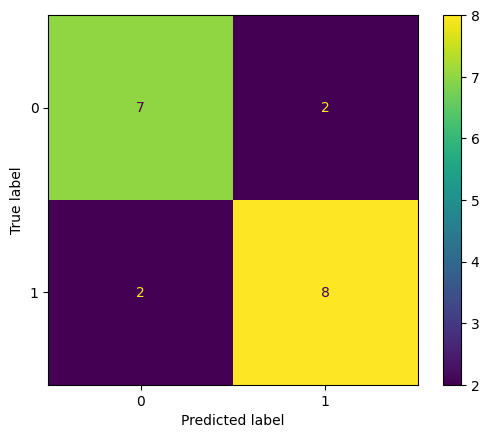

In [56]:
cm_display.plot()
plt.show()

# Save the best model

In [57]:
pickle.dump(clf, open('model.pkl', 'wb'))